,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,229.831878,149.368966,112.404125,225.827095,219.104346,27.751788,55.013160,2.330341,3.173601,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,321.643788,248.554496,151.296253,316.959067,307.362242,4.758023,28.778732,1.388202,1.770451,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.000000,0.000000,1.800000,4.300000,4.200000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,441.100000,241.300000,210.200000,421.900000,410.100000,31.100000,80.800000,3.200000,4.300000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1198.000000,904.100000,586.000000,1178.000000,1143.000000,41.400000,99.800000,6.700000,8.800000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


,missing_count,missing_percent
Comments,525600,100.0


Outliers removed per column:
GHI: 17 rows
DNI: 271 rows
DHI: 1527 rows
ModA: 22 rows
ModB: 20 rows
WS: 1421 rows
WSgust: 752 rows


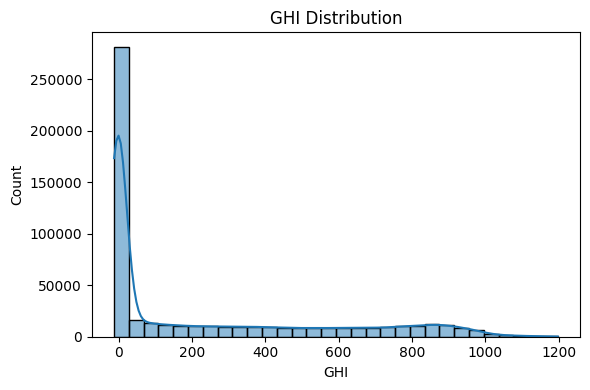

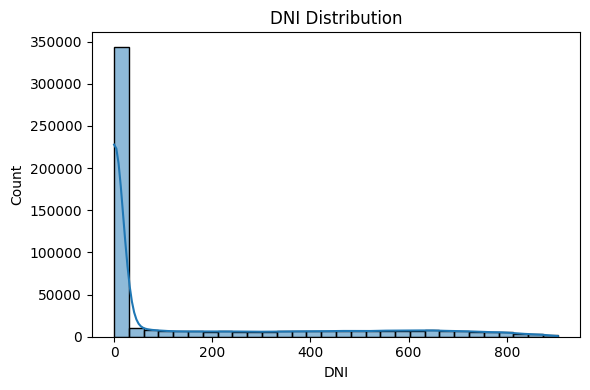

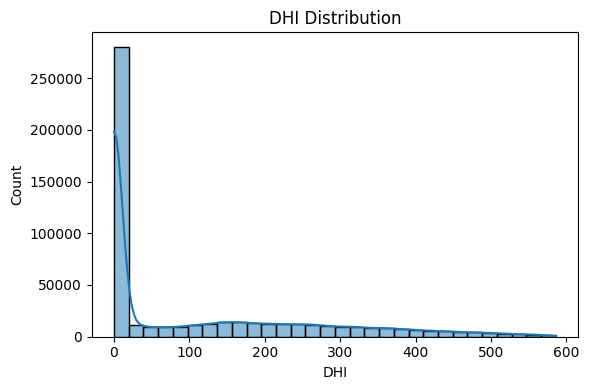

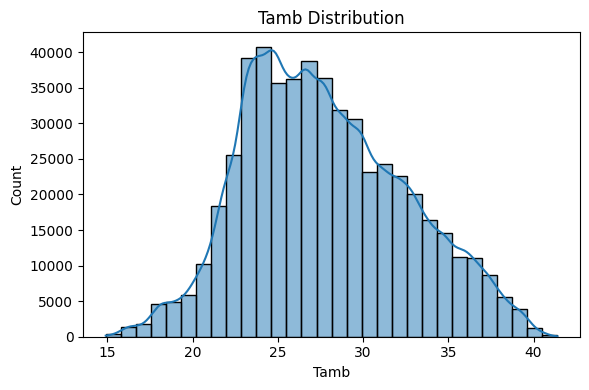

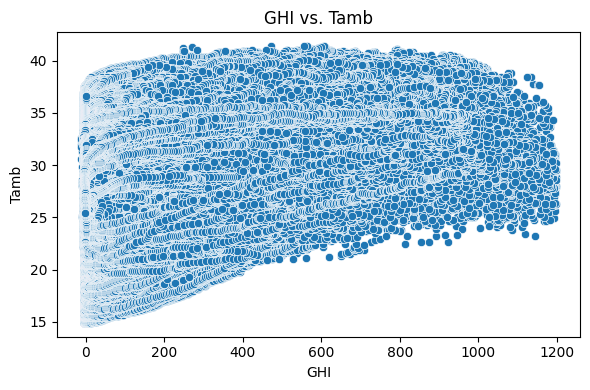

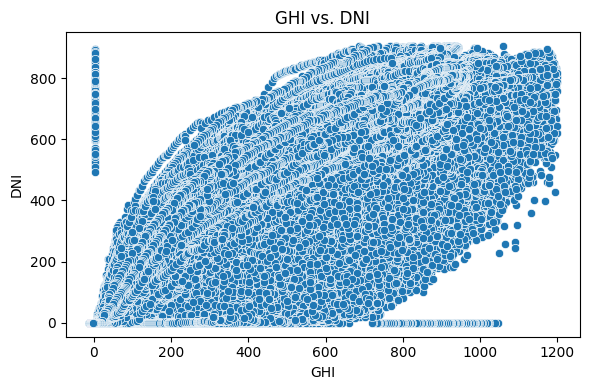

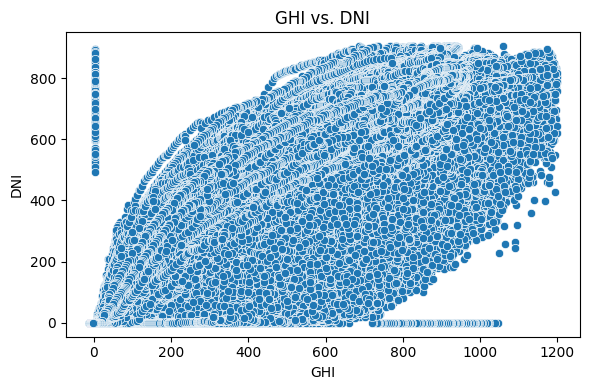

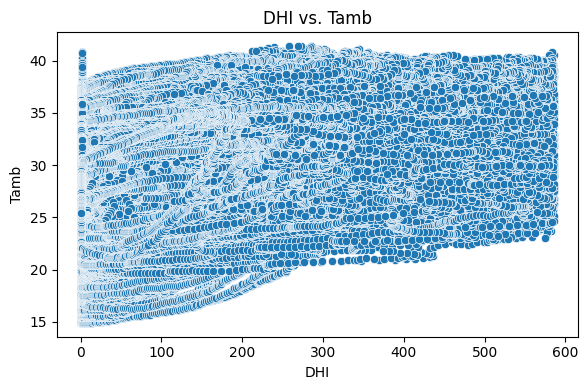

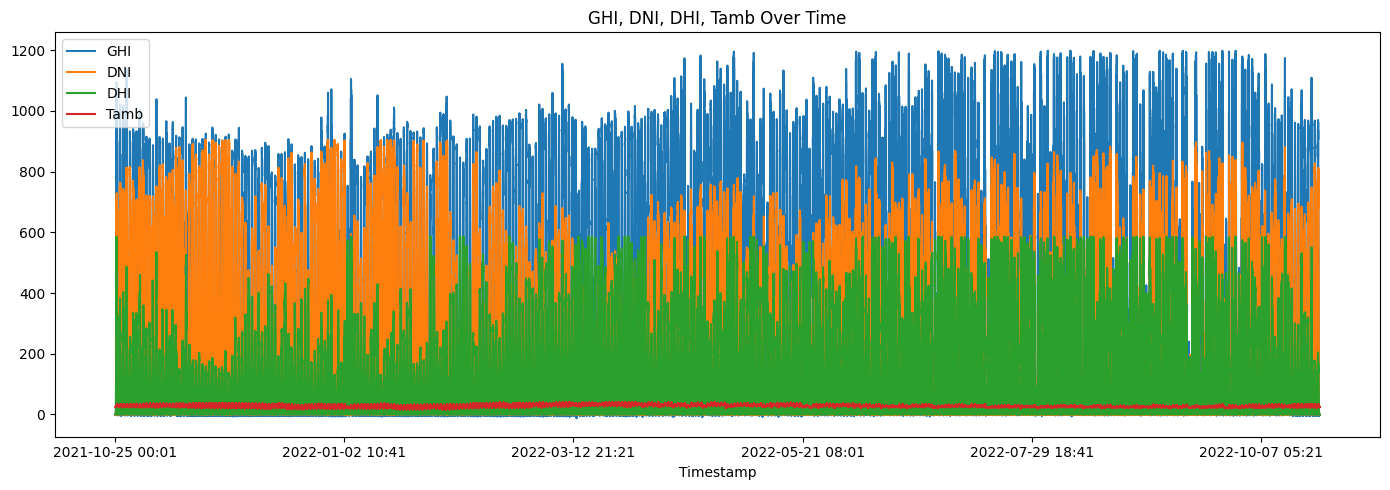

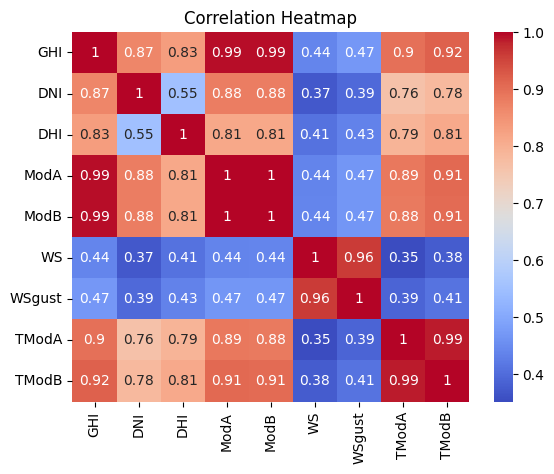

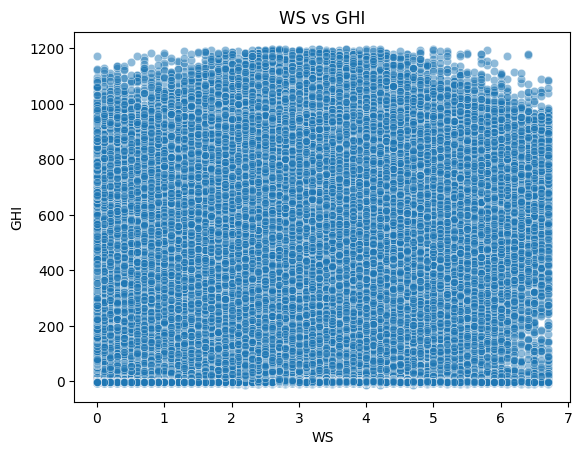

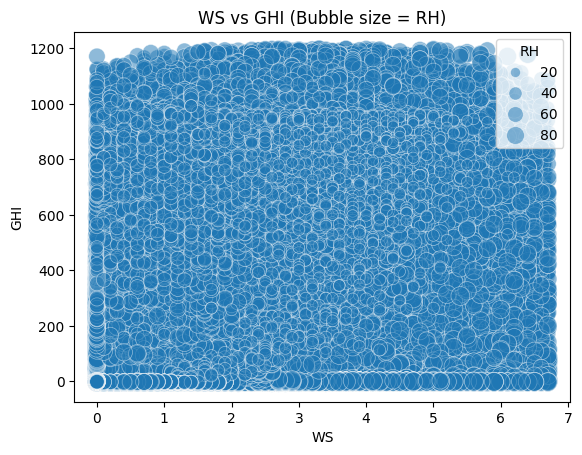

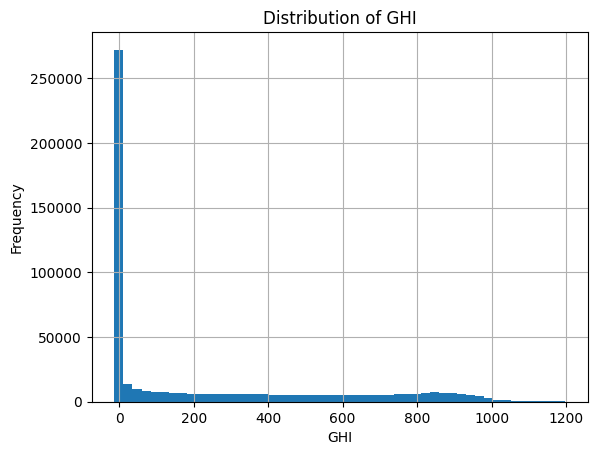

In [2]:
# %%
#import helper func
import sys
import os
sys.path.append(os.path.abspath("../")) 
from src.utils.utils import *


# %%
# reading the csv
df = load_data('../data/togo-dapaong_qc.csv')
df.head()

# %%
# Summary statistics
df.describe()

df = clean_data(df,['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])

# Summary
summary, missing = generate_summary(df)
display(summary)
display(missing)

#outliers 
outliers = detect_outliers_zscore(df,['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'],3.0)

# %%
# Multivariate
plot_univariate_histograms(df, ['GHI', 'DNI', 'DHI', 'Tamb'])

# Bivariate
plot_bivariate_scatters(df, [('GHI', 'Tamb'),['GHI', 'DNI'],['GHI', 'DNI'], ['DHI', 'Tamb']])


# %%
# Visualizations
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
timestamp_col = "Timestamp"
plot_time_series(df, time_col=timestamp_col, value_columns=['GHI', 'DNI', 'DHI', 'Tamb'])
plot_correlations(df, columns=key_columns + ['TModA', 'TModB'])
plot_scatter(df, x='WS', y='GHI', bubble_size_col='RH')
plot_histogram(df, column='GHI')


